In [4]:
#import local sql server user and pass from local config file
from config import user

#Enter postgre sql database name below
database_name = 'sql-challenge'

#import dependencies
import pandas as pd
import matplotlib.pyplot as plt

#Import SQL Alchemy to create connection
from sqlalchemy import create_engine

#connect to database - user is from config.py file and database_name is the name of your database referenced above.
engine = create_engine(f'postgresql://{user}@localhost/{database_name}')
connection = engine.connect()


In [5]:
#load sql table into dataframe
salary_df = pd.read_sql_table("salaries", con=engine)

In [6]:
#display dataframe for inspection
salary_df

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228
...,...,...
300019,499995,40000
300020,499996,58058
300021,499997,49597
300022,499998,40000


In [7]:
#check max and mix salary to ensure correct axis labels
print(salary_df["salary"].min())
print(salary_df["salary"].max())

40000
129492


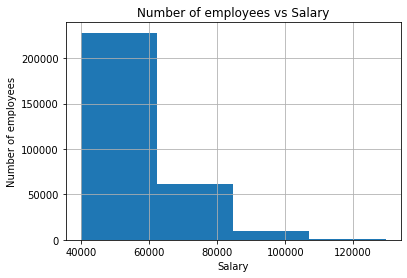

In [8]:
#create histogram of salaries
salary_df.hist(column="salary", bins=4)
plt.title("Number of employees vs Salary")
plt.xlabel("Salary")
plt.ylabel("Number of employees")
plt.savefig("Images/Employee-Salary-Histogram.png")

In [9]:
#import SQL table into DataFrame
title_df = pd.read_sql_table("titles", con=engine)

In [10]:
#display dataframe to inspect
title_df

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [11]:
#import SQL table into DataFrame
employee_df = pd.read_sql_table("employees", con=engine)

In [12]:
#display dataframe to inspect
employee_df

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [13]:
#rename emp_title column to match title id column
employee_df = employee_df.rename(columns={"emp_title":"title_id"})

In [14]:
#check renamed column
employee_df

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [15]:
#merge employee df with title df
merge_df = pd.merge(employee_df, title_df, on="title_id", how="inner")
merge_df

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,Staff
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,Staff
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,Staff
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,Staff
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,Staff
...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1/1/1985,Manager
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,12/30/1986,Manager
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1/1/1985,Manager
300022,110386,m0001,10/4/1953,Shem,Kieras,M,10/14/1988,Manager


In [16]:
#merge previously merged df with salary df
merge2_df = pd.merge(merge_df, salary_df, on="emp_no", how="inner")
merge2_df

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title,salary
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990,Staff,40000
1,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987,Staff,40000
2,273487,s0001,4/14/1957,Christoph,Parfitt,M,6/28/1991,Staff,56087
3,246449,s0001,3/23/1958,Subbu,Bultermann,F,3/25/1988,Staff,87084
4,48085,s0001,1/19/1964,Venkatesan,Gilg,M,6/28/1993,Staff,63016
...,...,...,...,...,...,...,...,...,...
300019,111400,m0001,11/9/1959,Arie,Staelin,M,1/1/1985,Manager,72446
300020,111133,m0001,3/16/1955,Hauke,Zhang,M,12/30/1986,Manager,71148
300021,110085,m0001,10/28/1959,Ebru,Alpin,M,1/1/1985,Manager,60026
300022,110386,m0001,10/4/1953,Shem,Kieras,M,10/14/1988,Manager,40000


In [17]:
#group by title and calculate average for salary
title_group = merge2_df.groupby(["title"])
average_salary = round(title_group["salary"].mean())
print(average_salary)

title
Assistant Engineer    48564.0
Engineer              48535.0
Manager               51531.0
Senior Engineer       48507.0
Senior Staff          58550.0
Staff                 58465.0
Technique Leader      48583.0
Name: salary, dtype: float64


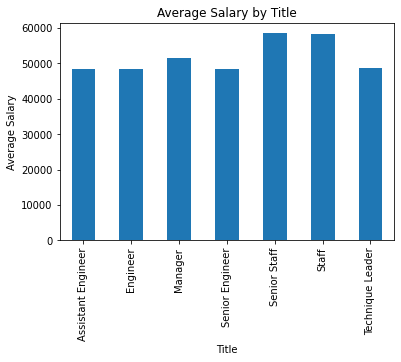

In [18]:
#plot average salary series as bar chart
average_salary.plot.bar()
plt.title("Average Salary by Title")
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.savefig("Images/Salary-Title-Bar.png")